In [102]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from pprint import pprint

In [103]:
data = pd.read_csv('ConcreteTest.csv')

In [104]:
len(data)

927

In [105]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28,33.69
1,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
2,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
3,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
4,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14,24.99


In [106]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [107]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28,33.69
1,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
2,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
3,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
4,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14,24.99


In [108]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

# Mengeksplor Data

In [109]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,281.610680,76.048544,53.732039,181.770011,6.141100,972.042503,772.371737,45.598706,36.017443
std,104.719752,87.096624,63.376794,21.149934,5.855464,77.771455,80.067349,62.771834,16.539500
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,725.950000,10.500000,24.025000
50%,275.000000,24.000000,0.000000,185.000000,6.400000,968.000000,778.500000,28.000000,34.740000
75%,355.000000,145.000000,118.200000,192.350000,10.150000,1028.400000,822.200000,56.000000,46.230000
max,540.000000,359.400000,200.100000,246.900000,32.200000,1145.000000,992.600000,365.000000,82.600000


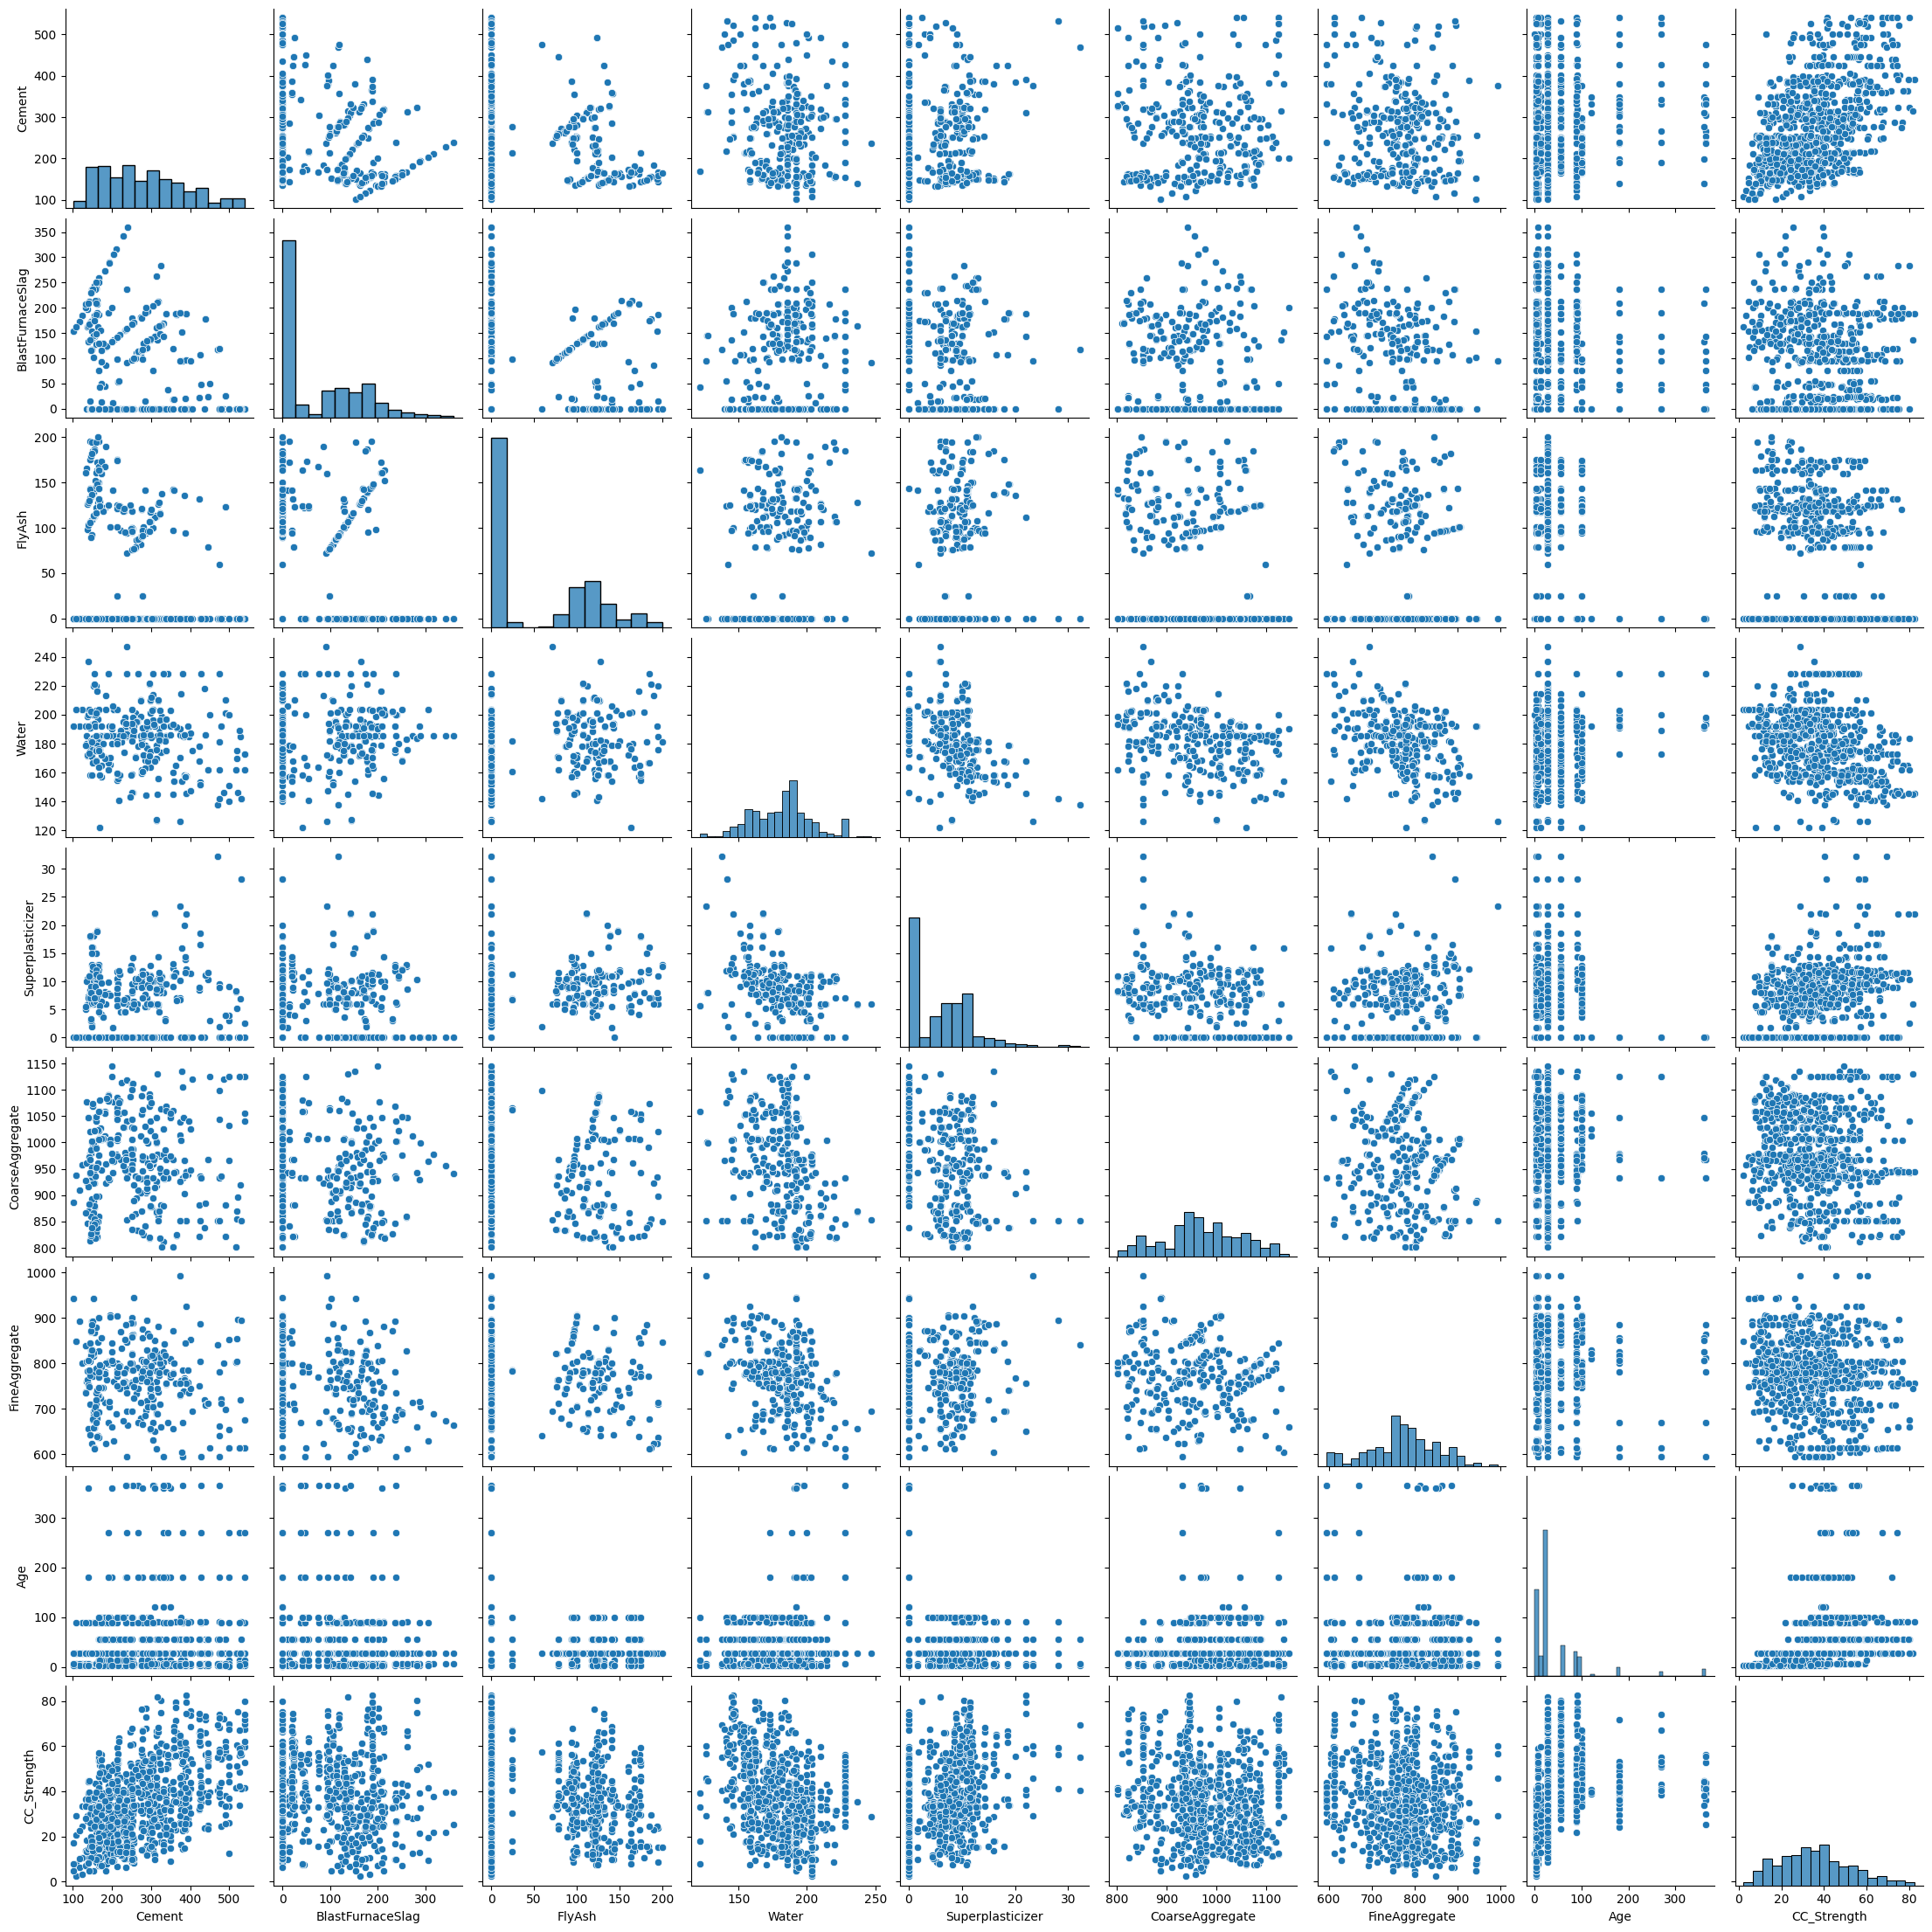

In [9]:
sns.pairplot(data)
plt.show()

Tidak berada korelasi tinggi antara variabel independent.

<Axes: xlabel='Superplasticizer'>

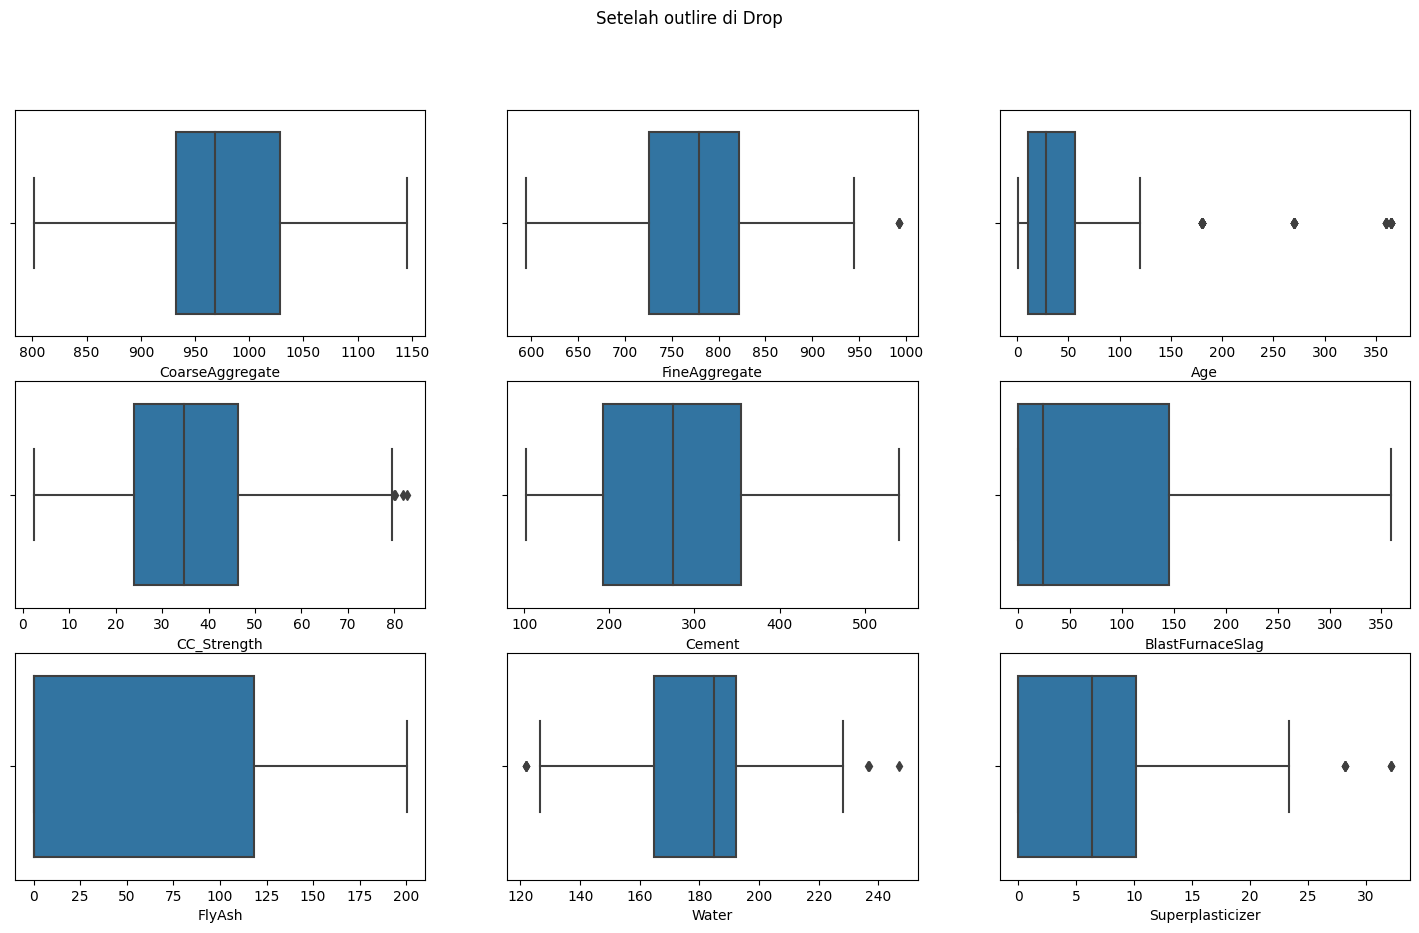

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

fig.suptitle('Setelah outlire di Drop')

sns.boxplot(ax = axes[0, 0], data = data, x ='CoarseAggregate')
sns.boxplot(ax = axes[0, 1], data = data, x ='FineAggregate')
sns.boxplot(ax = axes[0, 2], data = data, x ='Age')
sns.boxplot(ax = axes[1, 0], data = data, x ='CC_Strength')
sns.boxplot(ax = axes[1, 1], data = data, x ='Cement')
sns.boxplot(ax = axes[1, 2], data = data, x ='BlastFurnaceSlag')
sns.boxplot(ax = axes[2, 0], data = data, x ='FlyAsh')
sns.boxplot(ax = axes[2, 1], data = data, x ='Water')
sns.boxplot(ax = axes[2, 2], data = data, x ='Superplasticizer')

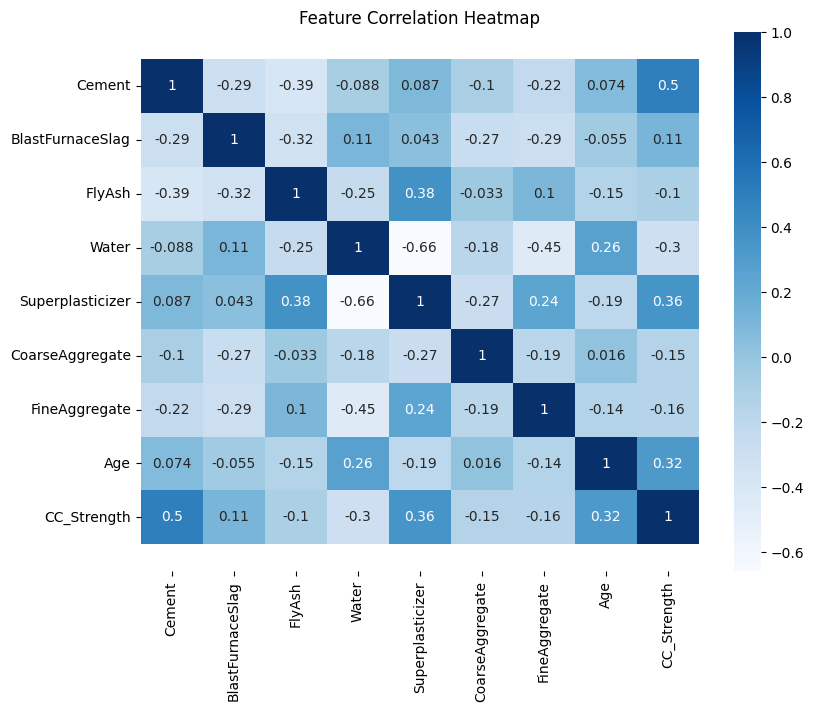

In [11]:
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Tidak ada korelasi yang tinggi antara kekuatan tekan dan fitur lain kecuali Semen, yang seharusnya terjadi untuk kekuatan yang lebih besar. 
Age dan superplastisizer adalah dua fitur lain yang sangat berkorelasi dengan Kekuatan Tekan. 
Superplastisizer tampaknya memiliki korelasi negatif yang tinggi dengan Air, korelasi positif dengan abu terbang dan agregat halus.

In [12]:
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

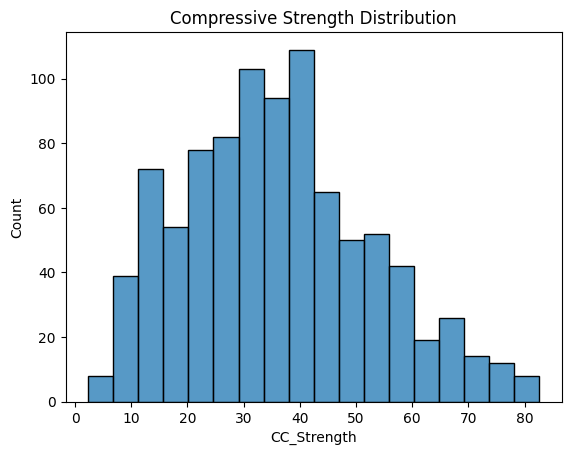

In [13]:
ax = sns.histplot(data.CC_Strength)
ax.set_title("Compressive Strength Distribution")

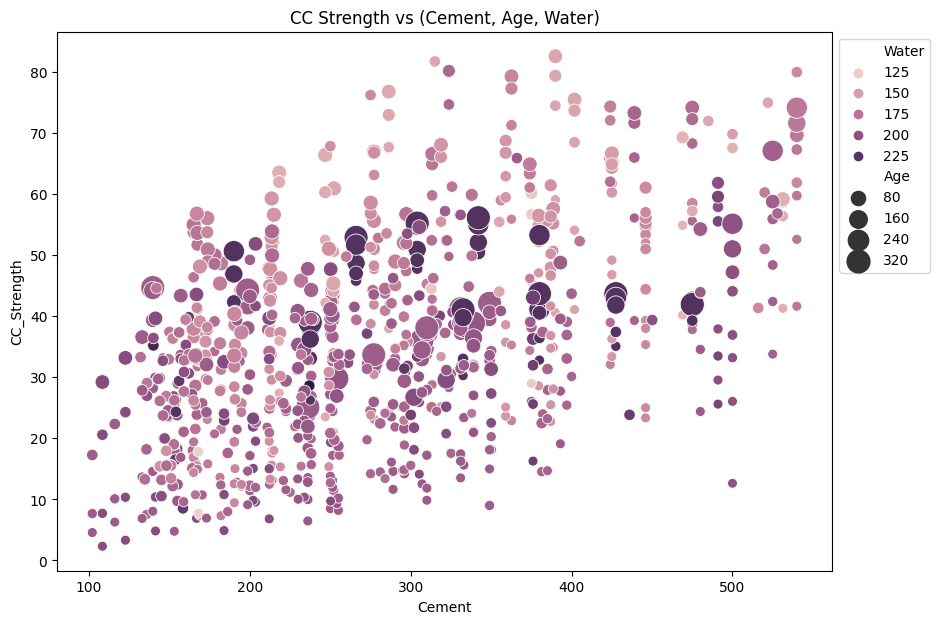

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Kekuatan tekan meningkat dengan jumlah semen.<br>
Kekuatan tekan meningkat dengan usia.<br>
Semen dengan usia yang lebih muda memerlukan lebih banyak semen untuk kekuatan yang lebih tinggi.<br>
Semakin tua semen, semakin banyak air yang diperlukan.<br>
Kekuatan beton meningkat ketika menggunakan sedikit air dalam persiapannya.<br>

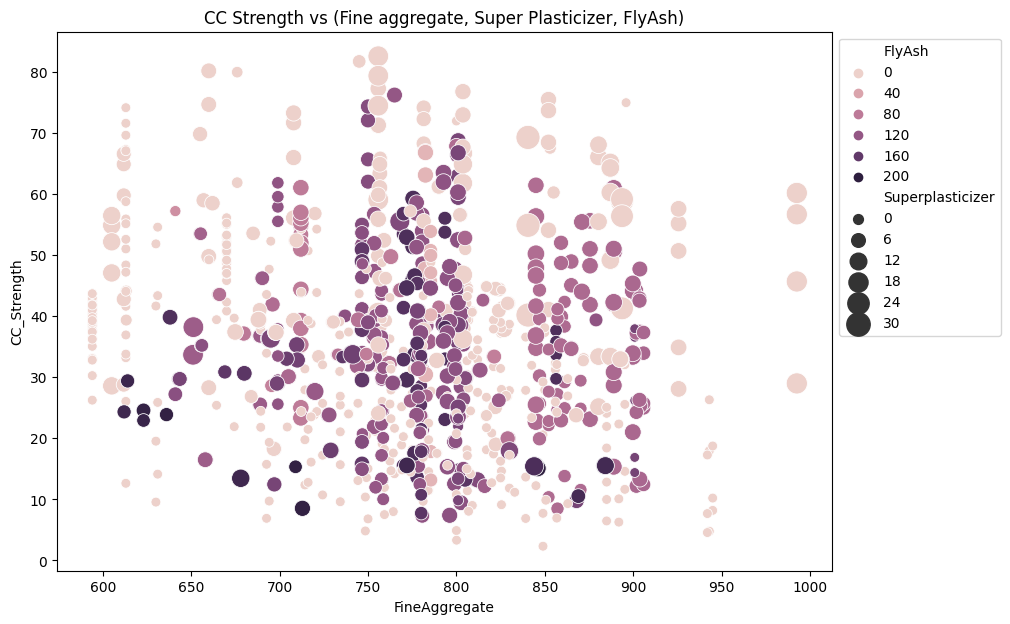

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Semakin banyak Flyash, kekuatan semakin menurun.<br>
Kekuatan meningkat dengan Superplastisizer.<br>

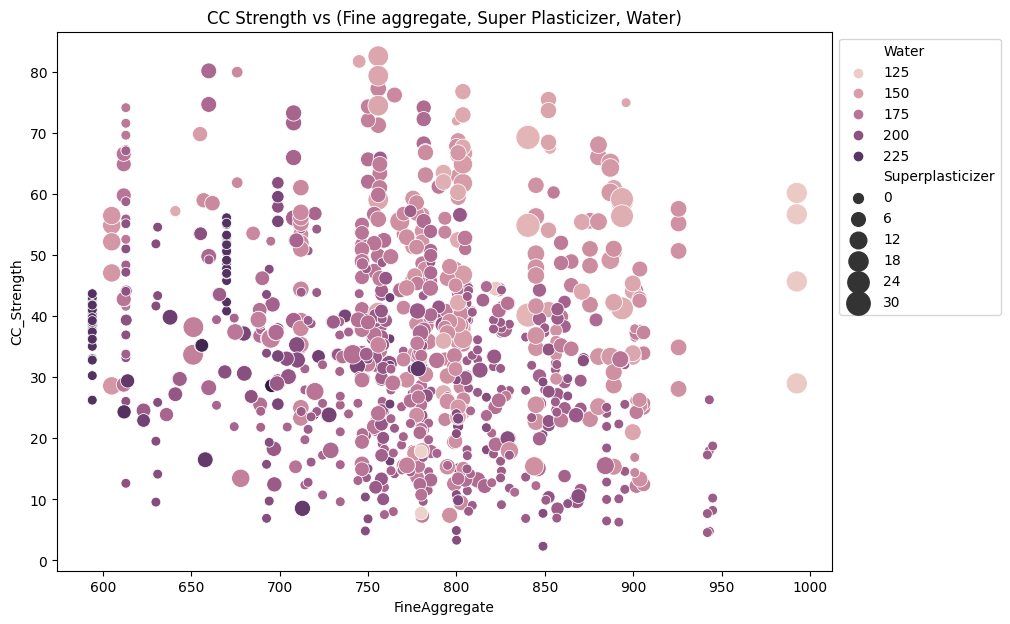

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="Water", size="Superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Kekuatan menurun dengan peningkatan air, kekuatan meningkat dengan peningkatan Superplastisizer (sudah terlihat dari plot di atas).<br>
Lebih banyak agregat halus digunakan ketika menggunakan sedikit air dan lebih banyak Superplastisizer.<br>

In [110]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

Splitting data menjadi Training dan Test splits. 80:20

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengstandarisasi data yaitu mereskal fitur-fitur sehingga memiliki rata-rata nol dan standar deviasi satu.

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regresi Linear, Lasso, dan Ridge

In [20]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.30 		 106.14 	8.15 		0.61
LassoRegression 	 10.88 		 118.46 	8.92 		0.57
RidgeRegression 	 10.30 		 106.06 	8.15 		0.61


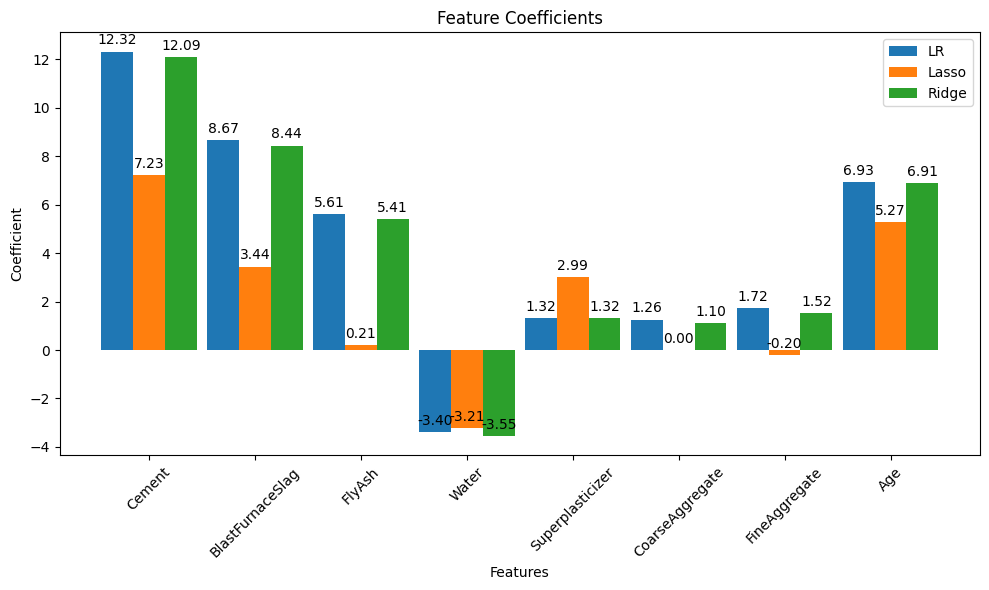

In [22]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

Kesimpulan:<br>
Regresi Lasso mengurangi kompleksitas model dengan menjaga koefisien sekecil mungkin. Selain itu, koefisien dengan Regresi Linier dan Ridge hampir sama.

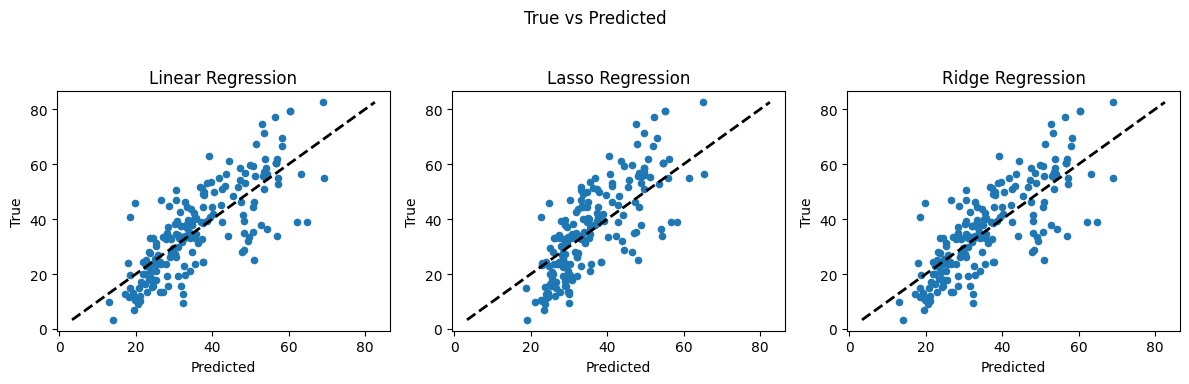

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Melihat grafik antara nilai-nilai yang diprediksi dan nilai sebenarnya dari variabel target, <br>
kita dapat menyimpulkan bahwa Regresi Linier dan Ridge berkinerja baik karena prediksi lebih dekat dengan nilai aktual. <br>
Sementara Regresi Lasso mengurangi kompleksitas dengan biaya kehilangan kinerja pada kasus ini. <br>
(Semakin dekat titik-titik dengan garis hitam, semakin kecil kesalahannya.)

## Regresi Decision Tree

Algoritma lain yang akan memberikan kinerja yang lebih baik dalam kasus ini adalah Decision Tree, karena kita memiliki banyak nol dalam beberapa fitur input seperti yang terlihat dari distribusi mereka dalam plot pasangan di atas.<br>
Hal ini akan membantu pohon keputusan membangun pohon berdasarkan beberapa kondisi pada fitur yang dapat lebih meningkatkan kinerja.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 5.82 		 33.83 		3.85 		0.88


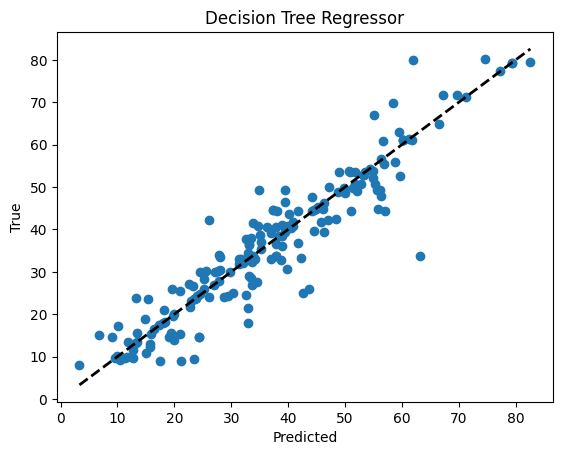

In [24]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

RMSE telah turun dari 10,88 menjadi 5,93, sehingga Regresor Decision Tree telah meningkatkan kinerja secara signifikan. Hal ini dapat diamati pada plot karena lebih banyak titik berada pada garis.

## Regresi Random Forest

Karena menggunakan Regresor Decision Tree telah meningkatkan kinerja kita,<br>
kita dapat lebih meningkatkan kinerja dengan menggabungkan lebih banyak pohon.<br>
Regresor Random Forest Acak melatih pohon-pohon yang diinisialisasi secara acak dengan subset data acak yang diambil dari data pelatihan, ini akan membuat model kita lebih tangguh.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.07 		 16.59 		3.03 		0.94


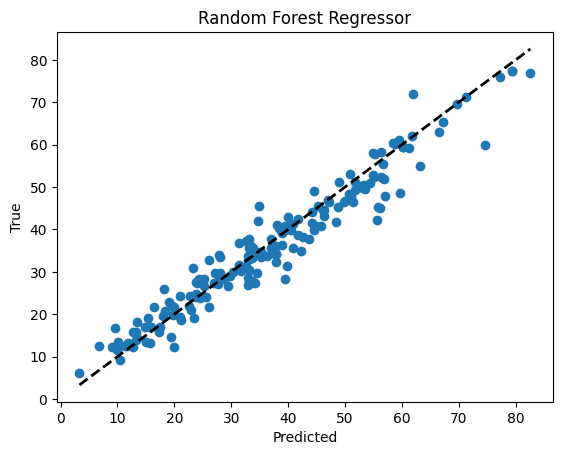

,Actual value,Predicted value
165,27.74,27.034408
430,39.00,39.197900
30,34.74,41.993950
67,21.16,18.680750
749,40.87,41.238500


In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=120,n_estimators=200)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

rfr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': rfr.predict(X_test)})

rfr_diff.head()

RMSE dengan Random Forest sekarang 4.07, kita telah mengurangi error dengan munggunakan banyak pohon.

## Regresi Random Forest + Hyperparameters

In [26]:
#from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
#max_depth.append(None)
#min_samples_split = [1, 2, 4]
#min_samples_leaf = [2, 5, 10]
#bootstrap = [True, False]
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
##               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#pprint(random_grid)
#{'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
#}

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=120, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [28]:
#rf_random.best_params_

In [29]:
#rf = rf_random.best_estimator_
#rf.fit(X_train,y_train)
#y_pred_rf = rf.predict(X_test)
#print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
#print("""Random Forest Regressor With Hyperparameter \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
#            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
#            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))
#
#plt.scatter(y_test, y_pred_rf)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
#plt.xlabel("Predicted")
#plt.ylabel("True")
#plt.title("Random Forest Regressor With Hyperparameter")
#plt.show()

RMSE dengan Random Forest dengan hyperparamer sekarang ~4.35, kita tidak dapat mengurangi error dari regresi sebelumnya dengan merubah paramternya secara random.

## Regresi Gradient Boosting 

Model				 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting 	 3.97 		 15.80 		3.06 		0.94


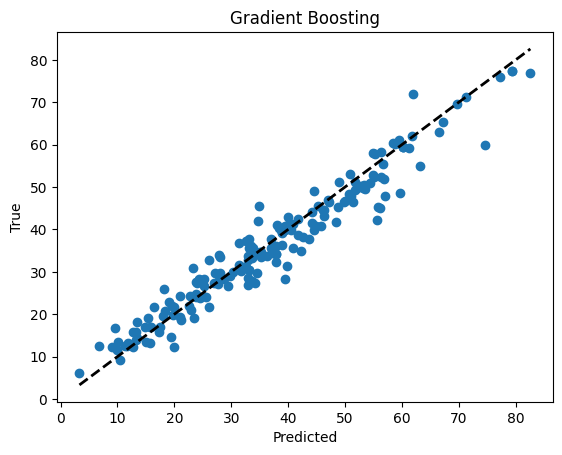

,Actual value,Predicted value
165,27.74,27.034408
430,39.00,39.197900
30,34.74,41.993950
67,21.16,18.680750
749,40.87,41.238500


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=120,n_estimators=200)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_gb)),mean_squared_error(y_test, y_pred_gb),
            mean_absolute_error(y_test, y_pred_gb), r2_score(y_test, y_pred_gb)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting")
plt.show()

gb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': rfr.predict(X_test)})

gb_diff.head()

## Regresi XGBoosting

Model				 RMSE 		 MSE 		 MAE 		 R2
XGBoosting Regressor 	 3.84 		 14.76 		2.69 		0.95


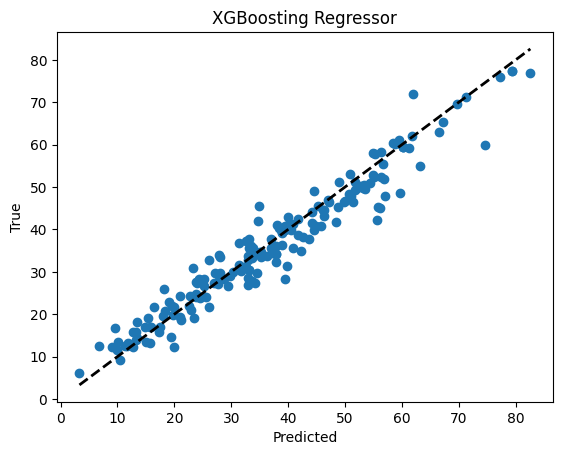

,Actual value,Predicted value
165,27.74,27.034408
430,39.00,39.197900
30,34.74,41.993950
67,21.16,18.680750
749,40.87,41.238500


In [31]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=120,n_estimators=200)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBoosting Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xgb)),mean_squared_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoosting Regressor")
plt.show()

gb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': rfr.predict(X_test)})

gb_diff.head()

Bisa dilihat bahwa gradient boosting memiliki RMSE yang lebih besar daripada algoritma yang menggunakan sistem pohon.

## Artificial Neural Network Regresi

Mencoba ANN untuk model regresi

In [113]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [139]:
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(50, activation='relu')) 
model.add(Dense(50, activation='relu')) #2
model.add(Dense(50, activation='relu')) #3
model.add(Dense(50, activation='relu')) #4
model.add(Dense(50, activation='relu')) #5
model.add(Dense(50, activation='relu')) #6

model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=250,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 50)                450       
                                                                 
 dense_131 (Dense)           (None, 50)                2550      
                                                                 
 dense_132 (Dense)           (None, 50)                2550      
                                                                 
 dense_133 (Dense)           (None, 50)                2550      
                                                                 
 dense_134 (Dense)           (None, 50)                2550      
                                                                 
 dense_135 (Dense)           (None, 50)                2550      
                                                                 
 dense_136 (Dense)           (None, 50)              

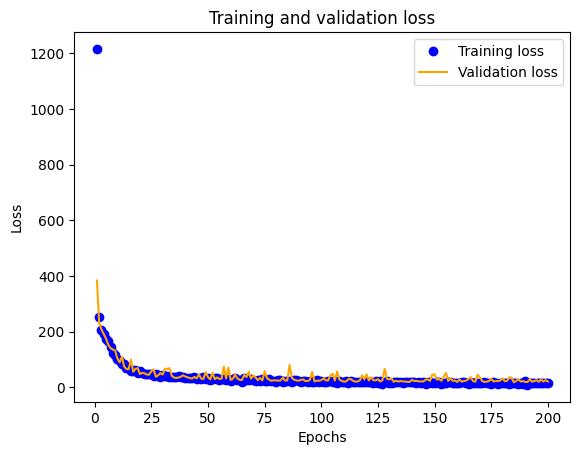

In [140]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 1ms/step


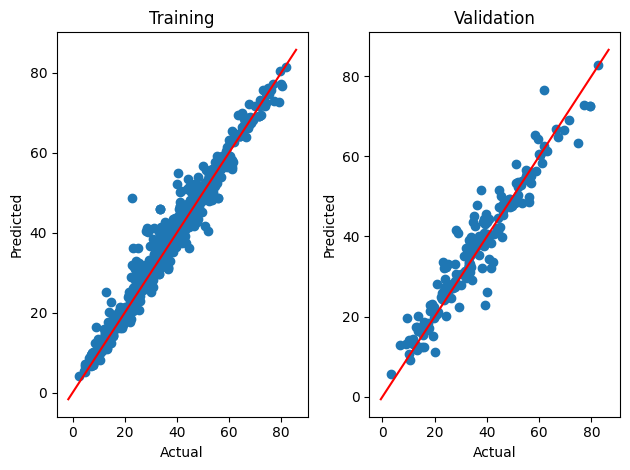

In [141]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [142]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

24/24 [==============================] - 0s 791us/step
2.0694034603700624
3.2657662515742802


Model				 RMSE 		 MSE 		 MAE 		 R2
Artificial Neural Network 	 4.64 		 21.56 		3.27 		0.92


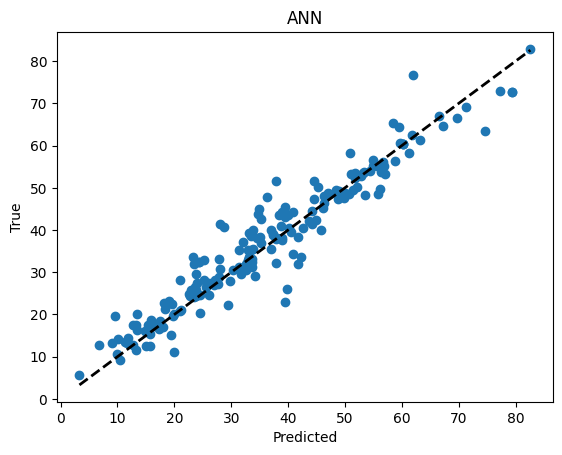

In [143]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Artificial Neural Network \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, pred)),mean_squared_error(y_test, pred),
            mean_absolute_error(y_test, pred), r2_score(y_test, pred)))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ANN")
plt.show()

#model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':  model.predict(X_test)})
#model_diff.head()

## Kepentingan variable independen berdasarkan Algoritma Tree dan Gradient

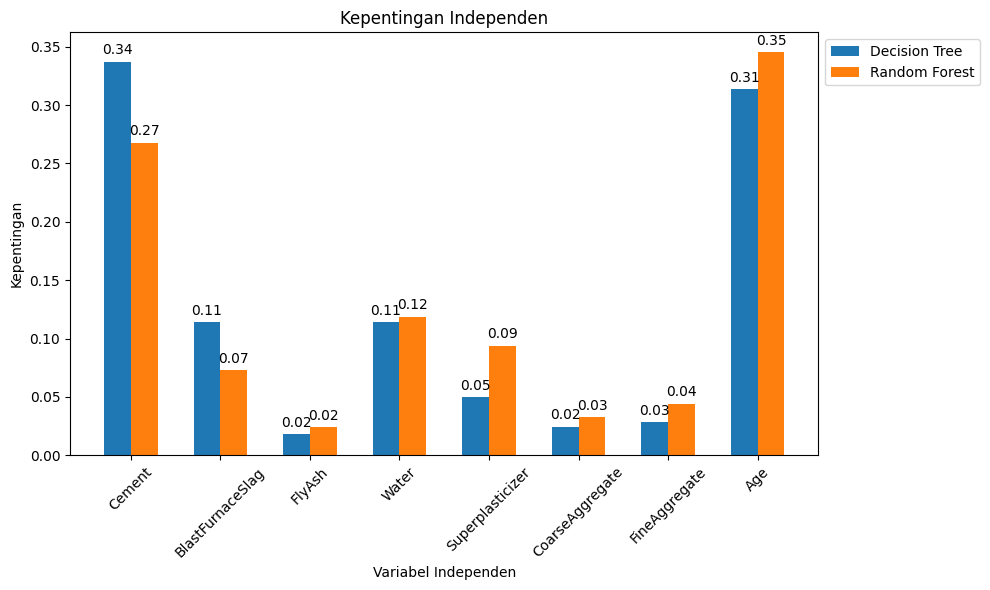

In [38]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Kepentingan')
ax.set_xlabel('Variabel Independen')
ax.set_title('Kepentingan Independen')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

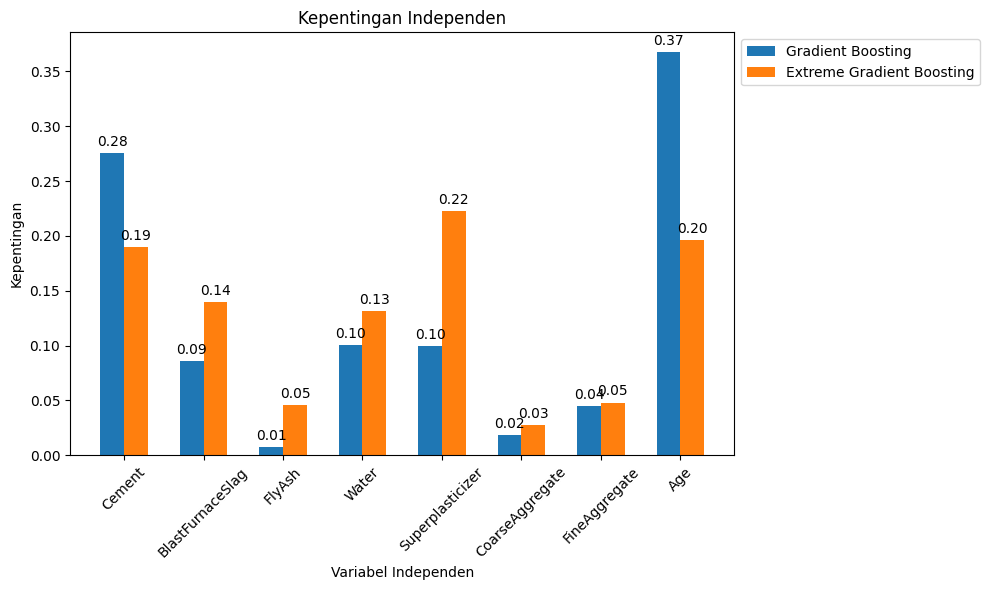

In [39]:
feature_gb = gb.feature_importances_
feature_xgb = xgb.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_gb, width, label='Gradient Boosting')
rects2 = ax.bar(x+(width/2), feature_xgb, width, label='Extreme Gradient Boosting')

ax.set_ylabel('Kepentingan')
ax.set_xlabel('Variabel Independen')
ax.set_title('Kepentingan Independen')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Cement dan Usia (Age) dianggap sebagai fitur yang paling penting oleh model berbasis gradien dan pohon.<br> Flyash, Agregat Kasar, dan Agregat Halus adalah faktor yang paling tidak penting ketika memprediksi kekuatan beton.
<br>
<br>
Akhirnya untuk melihat hasil dari seluruh Regresi

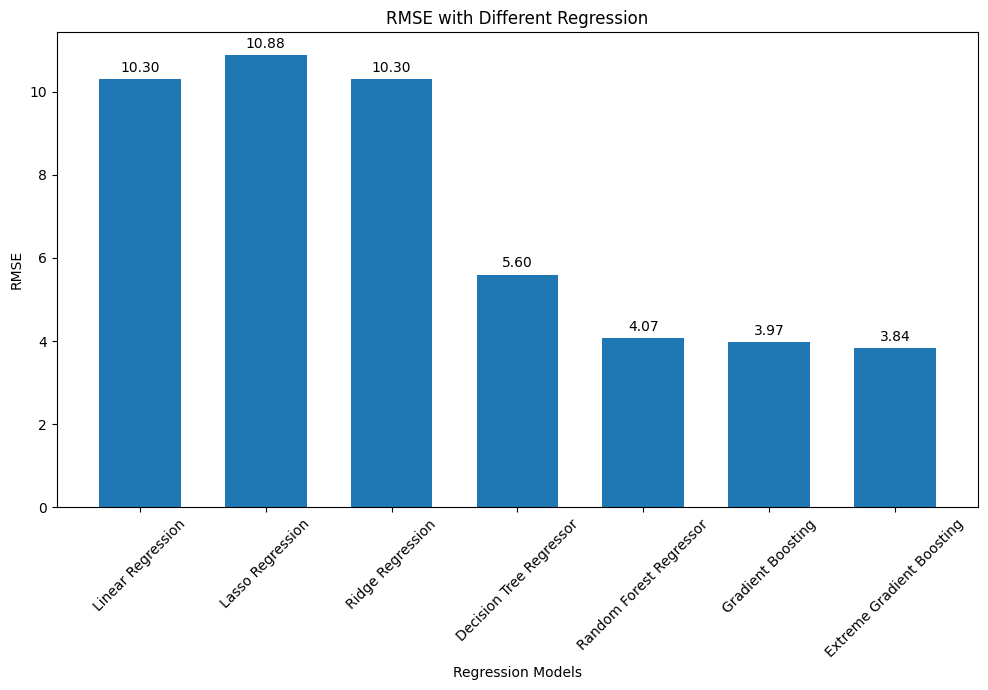

In [173]:
models = [lr, lasso, ridge, dtr, rfr, gb, xgb]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor", 
         "Gradient Boosting", "Extreme Gradient Boosting"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.65

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regression Models')
ax.set_title('RMSE with Different Regression')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Kesimpulan <br>

**Extreme Gradient Boosting** paling bagus sebagai model prediksi terbaik.<br><br>
**Artificial Neural Network** juga bisa digunakan sebagai model prediksi baik dengan rata-rata RMSE 3.8, <br> 
dengan menggunakan parameter epochs = 2000, batch_size = 50, dan patience = 250. 